In [40]:
from mnspy import Derivada, Richardson
import numpy as np
import sympy as sp
import pandas as pd

# Ejemplos de Diferenciación Numérica
 
**Problema:**

Calcular la primera derivada de la función $f(x) = \cos(x)$ en el punto $x = \pi/4$ y comparar la precisión de las diferentes fórmulas de diferencias finitas. Se usará un tamaño de paso $h = \pi/12$.

### Opciones de la clase `Derivada`

- **`modo`**: `'adelante'`, `'atrás'`, `'centrada'`.
- **`orden`**: Precisión del método.
    - `'h'` y `'h2'` para los modos `'adelante'` y `'atrás'`.
    - `'h2'` y `'h4'` para el modo `'centrada'`.

# --- 1. Configuración del Problema ---

In [41]:
# Definimos la función, el punto de evaluación y el tamaño de paso.
def f(x):
    return np.cos(x)
x_val = np.pi / 4
h_val = np.pi / 12

# --- 2. Solución Analítica Exacta con SymPy ---

In [42]:
# Calculamos el valor verdadero de la derivada para usarlo como referencia y calcular el error de las aproximaciones.
# La derivada de cos(x) es -sin(x).
x = sp.symbols('x')
f_sym = sp.cos(x)
df_sym = f_sym.diff(x)
valor_exacto = df_sym.subs({x: sp.pi/4})
valor_exacto_float = valor_exacto.evalf()
print(f"La derivada analítica es:")
df_sym

La derivada analítica es:


In [43]:
print(f"El valor exacto en x=π/4 es:")
valor_exacto_float

El valor exacto en x=π/4 es:


# --- 3. Aproximaciones Numéricas y Comparación de Errores ---

In [44]:
# Crearemos una lista para almacenar los resultados y compararlos al final.
resultados = []
 
def calcular_y_registrar(modo, orden, etiqueta):
    """Función auxiliar para calcular, imprimir y guardar resultados."""
    der = Derivada(f, modo=modo, orden=orden, h=h_val)
    der.derivar(x_val)
    valor_aprox = der.derivada
    error_rel = np.abs((valor_exacto_float - valor_aprox) / valor_exacto_float) * 100
    
    print(f"--- {etiqueta} (Orden {orden}) ---")
    print(f"Valor aproximado: {valor_aprox:.6f}")
    print(f"Error relativo: {error_rel:.4f} %\n")
    
    resultados.append({
        'Método': etiqueta,
        'Orden': orden,
        'Valor Aproximado': valor_aprox,
        'Error Relativo (%)': error_rel
    })
    der.graficar(x_val, 0, 1.5) # Descomentar para ver gráficas individuales

# Calculamos para cada combinación de método y orden.
## Diferencias hacia adelante

--- Adelante (Orden h) ---
Valor aproximado: -0.791090
Error relativo: 11.8770 %



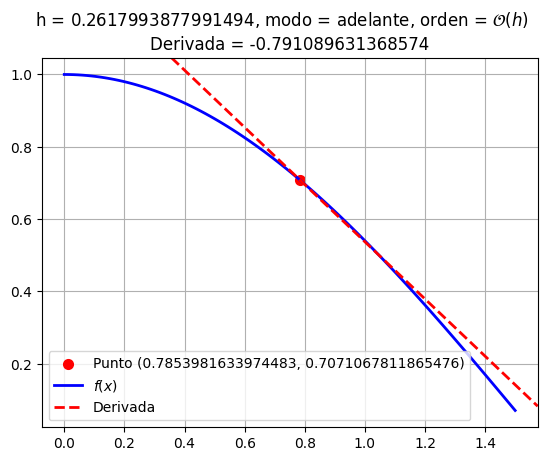

--- Adelante (Orden h2) ---
Valor aproximado: -0.726013
Error relativo: 2.6737 %



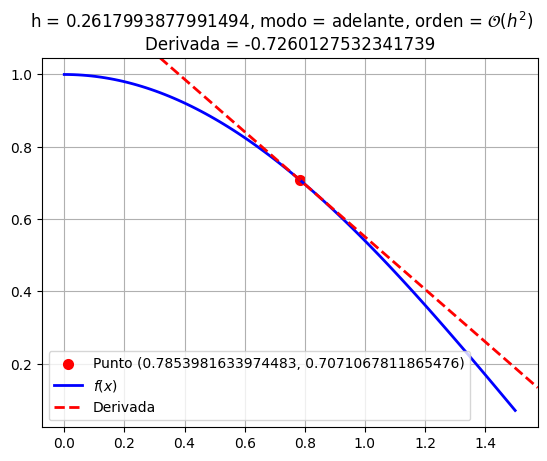

In [45]:
calcular_y_registrar('adelante', 'h', 'Adelante')
calcular_y_registrar('adelante', 'h2', 'Adelante')

## Diferencias hacia atrás

--- Atrás (Orden h) ---
Valor aproximado: -0.607024
Error relativo: 14.1538 %



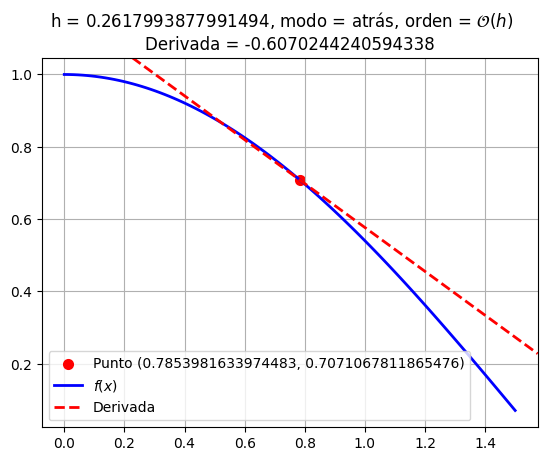

--- Atrás (Orden h2) ---
Valor aproximado: -0.719741
Error relativo: 1.7867 %



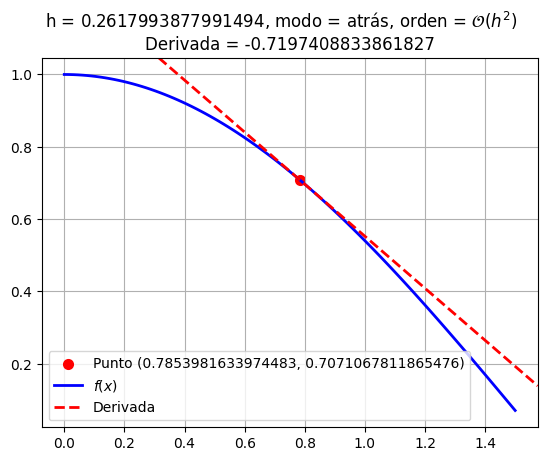

In [46]:
calcular_y_registrar('atrás', 'h', 'Atrás')
calcular_y_registrar('atrás', 'h2', 'Atrás')

## Diferencias centradas

--- Centrada (Orden h2) ---
Valor aproximado: -0.699057
Error relativo: 1.1384 %



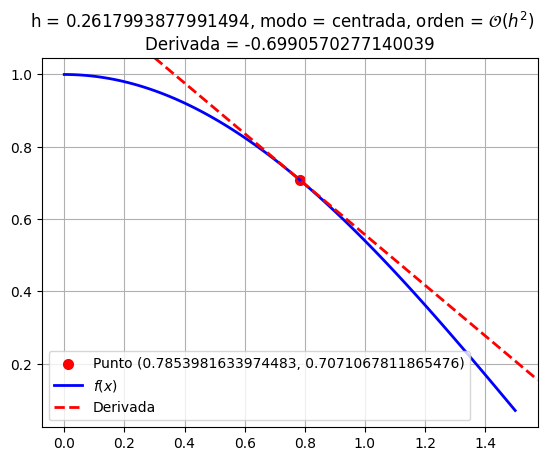

--- Centrada (Orden h4) ---
Valor aproximado: -0.706997
Error relativo: 0.0155 %



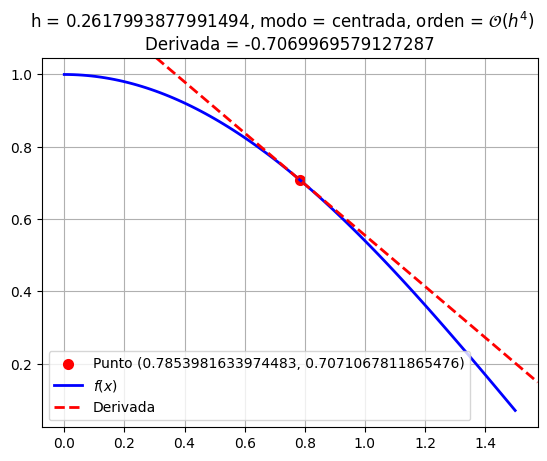

In [47]:
calcular_y_registrar('centrada', 'h2', 'Centrada')
calcular_y_registrar('centrada', 'h4', 'Centrada')

# --- 4. Resumen de Resultados ---

In [48]:
# Usamos pandas para mostrar una tabla comparativa clara.
df_resultados = pd.DataFrame(resultados)
df_resultados.set_index(['Método', 'Orden'], inplace=True)
df_resultados

Valor Aproximado  Error Relativo (%)
Método   Orden                                      
Adelante h             -0.791090    11.8769685734170
         h2            -0.726013    2.67370820795998
Atrás    h             -0.607024    14.1537826803432
         h2            -0.719741    1.78673186791317
Centrada h2            -0.699057    1.13840705346312
         h4            -0.706997  0.0155313563298932

In [ ]:
### Conclusión
 
De la tabla de resultados se pueden extraer las siguientes conclusiones clave:

1.  **Precisión del Método**: Las diferencias **centradas** son significativamente más precisas (menor error) que las diferencias hacia **adelante** o hacia **atrás** para el mismo orden de error.
2.  **Orden de Error**: Para un mismo método (ej. "Adelante"), las fórmulas de mayor orden (ej. `h2` vs `h`) producen resultados mucho más precisos.
3.  **Mejor Aproximación**: La fórmula de diferencias centradas de orden $O(h^4)$ ofrece la mejor aproximación, con un error relativo extremadamente bajo.

Esto demuestra la importancia de elegir un método numérico adecuado para minimizar el error de truncamiento.

In [2]:
def f(x):
    return np.cos(x)

In [3]:
der = Derivada(f, orden='h', h= np.pi/12, modo='adelante')

In [4]:
der.derivar(np.pi/4)
der.derivada

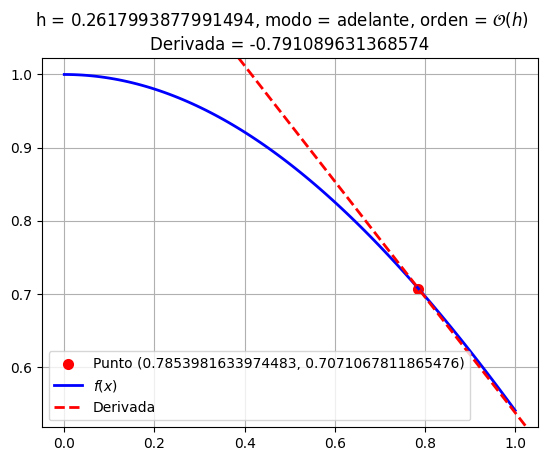

In [5]:
der.graficar(np.pi/4,0,1)

In [6]:
der = Derivada(f, orden='h2', h= np.pi/12, modo='adelante')

In [7]:
der.derivar(np.pi/4)
der.derivada

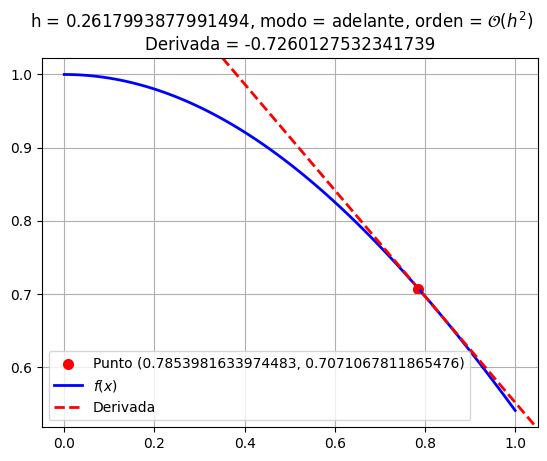

In [8]:
der.graficar(np.pi/4,0,1)

In [9]:
der = Derivada(f, orden='h', h= np.pi/12, modo='atrás')

In [10]:
der.derivar(np.pi/4)
der.derivada

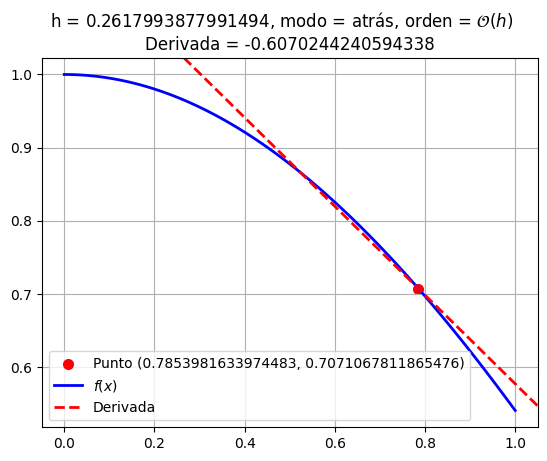

In [11]:
der.graficar(np.pi/4,0,1)

In [12]:
der = Derivada(f, orden='h2', h= np.pi/12, modo='atrás')

In [13]:
der.derivar(np.pi/4)
der.derivada

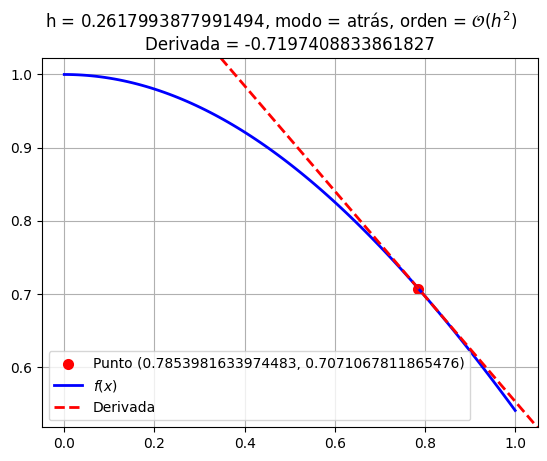

In [14]:
der.graficar(np.pi/4,0,1)

In [15]:
der = Derivada(f, orden='h2', h= np.pi/12, modo='centrada')

In [16]:
der.derivar(np.pi/4)
der.derivada

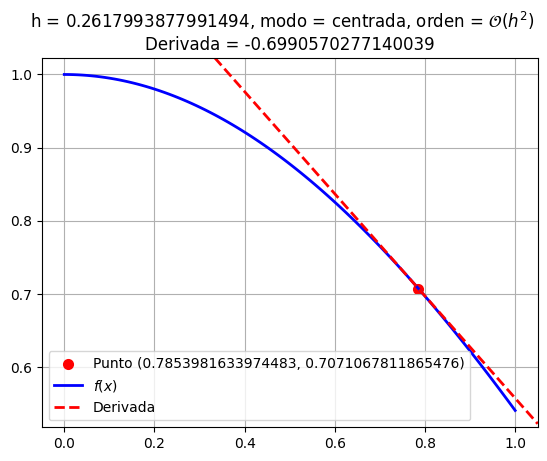

In [17]:
der.graficar(np.pi/4,0,1)

In [18]:
der = Derivada(f, orden='h4', h= np.pi/12, modo='centrada')

In [19]:
der.derivar(np.pi/4)
der.derivada

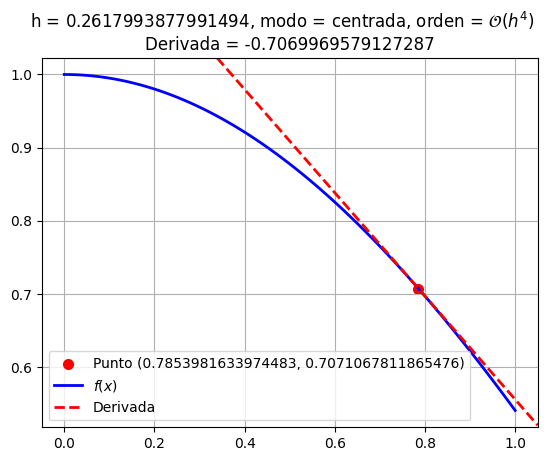

In [20]:
der.graficar(np.pi/4,0,1)

# Solución exacta con Sympy

In [21]:
import sympy as sp
x = sp.symbols('x')
f=sp.cos(x)
f

In [22]:
f.diff(x)

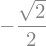

In [23]:
f.diff(x).subs({x:sp.pi/4})

In [24]:
f.diff(x).subs({x:sp.pi/4}).evalf()